In [131]:
import pandas as pd
df = pd.read_csv(r"C:\Users\zacha\神州\data\csv\insurance.csv")
df.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


In [132]:
df.charges.corr(df.bmi)

0.19834096883362892

In [133]:
from scipy import stats
r,p = stats.pearsonr(df.charges, df.age)
print(round(r,4))
print(round(p,29))

0.299
5.0000000000000004e-29


In [134]:
corr_df = pd.DataFrame(columns=['r','p'])

for col in df:
    print(col)
    if pd.api.types.is_numeric_dtype(df[col]) and col != 'charges':
        r,p = stats.pearsonr(df.charges, df[col])
        corr_df.loc[col] = [round(r,3), round(p,3)]
        
corr_df

age
sex
bmi
children
smoker
region
charges


,r,p
age,0.299,0.000
bmi,0.198,0.000
children,0.068,0.013


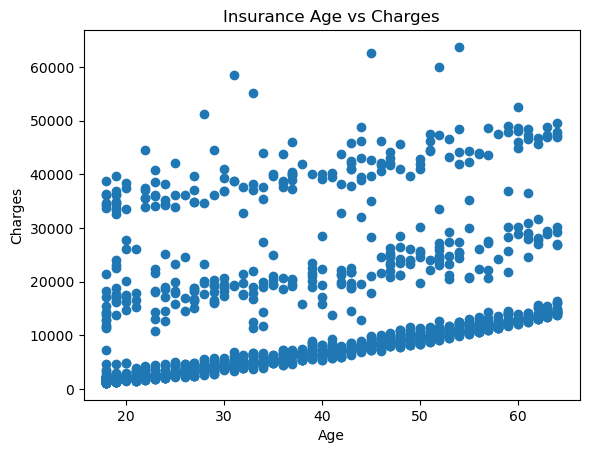

In [135]:
import matplotlib.pyplot as plt
plt.scatter(df.age, df.charges)
plt.title('Insurance Age vs Charges')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()

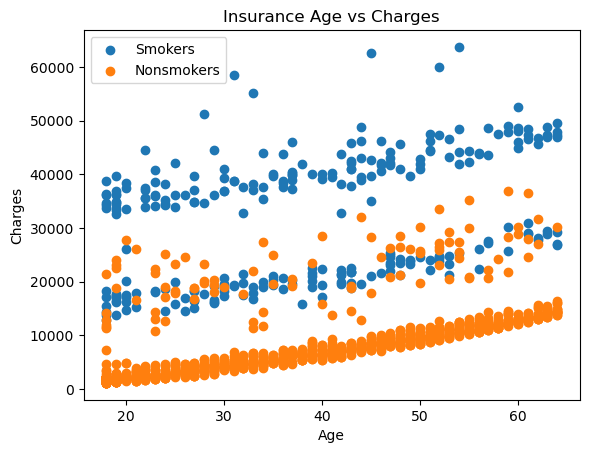

In [136]:
df_smoker = df[df['smoker'] == 'yes']
df_nonsmoker = df[df['smoker'] == 'no']

plt.scatter(df_smoker.age, df_smoker.charges, label = 'Smokers')
plt.scatter(df_nonsmoker.age, df_nonsmoker.charges, label = 'Nonsmokers')
plt.title('Insurance Age vs Charges')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend()
plt.show()

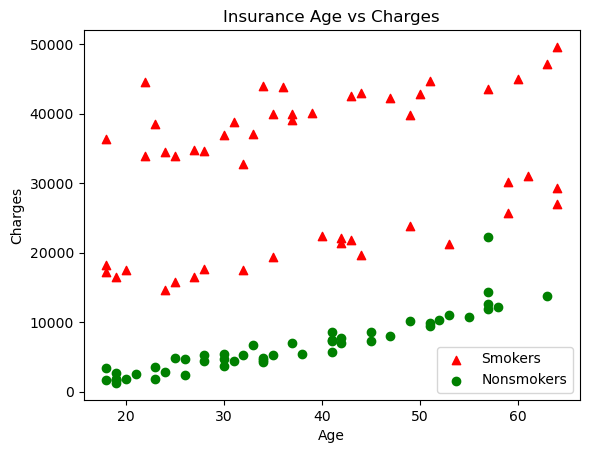

In [137]:
df_smoker_sample = df_smoker.sample(50)
df_nonsmoker_sample = df_nonsmoker.sample(50) 

plt.scatter(df_smoker_sample.age, df_smoker_sample.charges, label = 'Smokers', color = 'red', marker = '^')
plt.scatter(df_nonsmoker_sample.age, df_nonsmoker_sample.charges, label = 'Nonsmokers', color = 'green', marker = 'o')
plt.title('Insurance Age vs Charges')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend()
plt.show()

LinregressResult(slope=257.7226186668955, intercept=3165.885006063025, rvalue=0.2990081933306477, pvalue=4.886693331718491e-29, stderr=22.5023892867703, intercept_stderr=937.1494650703767)


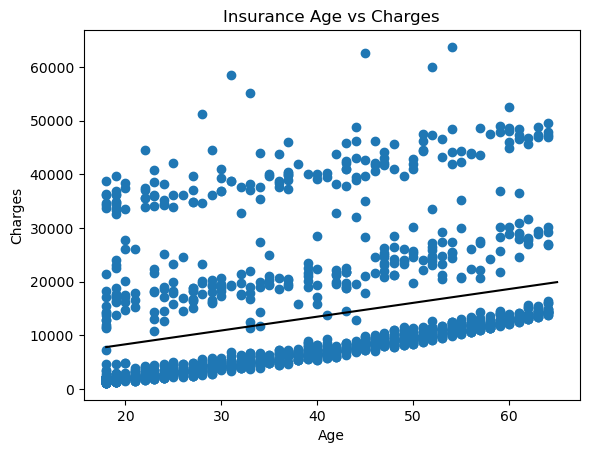

In [138]:
from scipy import stats
print(stats.linregress(df.age, df.charges))

m,b,r,p,err = stats.linregress(df.age, df.charges)

x = range(18,df.age.max() + 2)
y = m * x + b
plt.plot(x,y, color = 'black')

plt.scatter(df.age, df.charges)
plt.title('Insurance Age vs Charges')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()

In [140]:
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.diagnostic import het_white
from statsmodels.formula.api import ols

model = ols(formula = 'charges~age', data = df).fit()

bp_test = het_breuschpagan(model.resid, model.model.exog)
het_test = het_white(model.resid, model.model.exog)

output_df = pd.DataFrame(columns = ['LM Stat', 'P-Value', 'F-Value', 'F-Value, P'])
output_df.loc['Het'] = het_test
output_df.loc['Breusch-Pagan'] = bp_test

output_df

,LM Stat,P-Value,F-Value,"F-Value, P"
Het,0.002713,0.998645,0.001353,0.998648
Breusch-Pagan,0.000413,0.983776,0.000413,0.983792


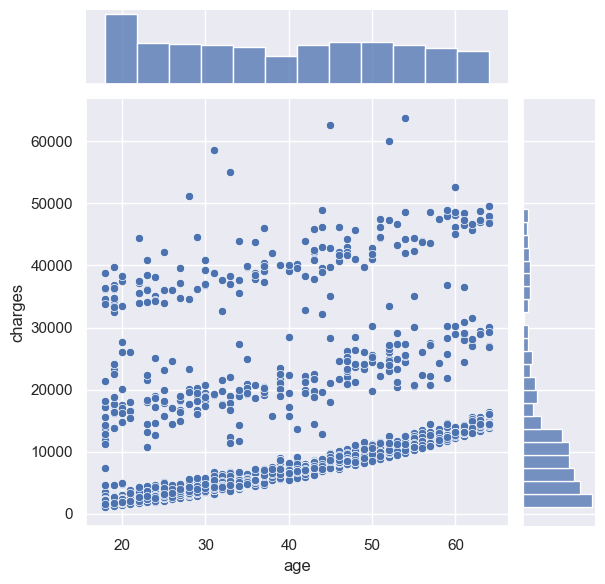

In [145]:
import seaborn as sns
sns.set(color_codes=True)
sns.jointplot(x='age',y='charges',data=df);

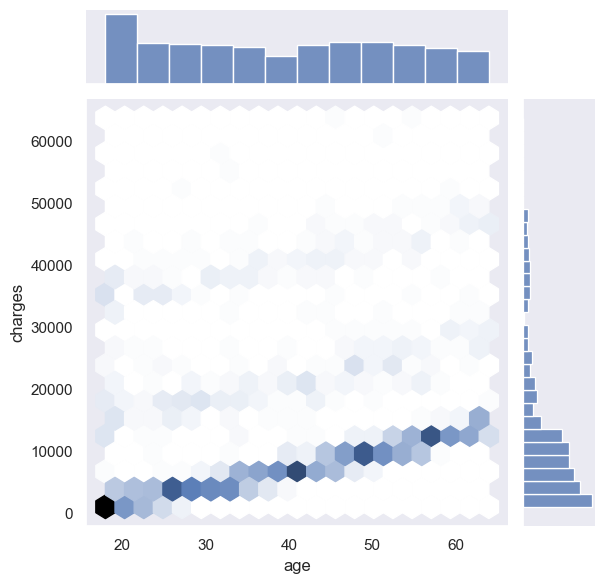

In [148]:
sns.set_style("dark")
sns.jointplot(x='age',y='charges',data=df,kind='hex');

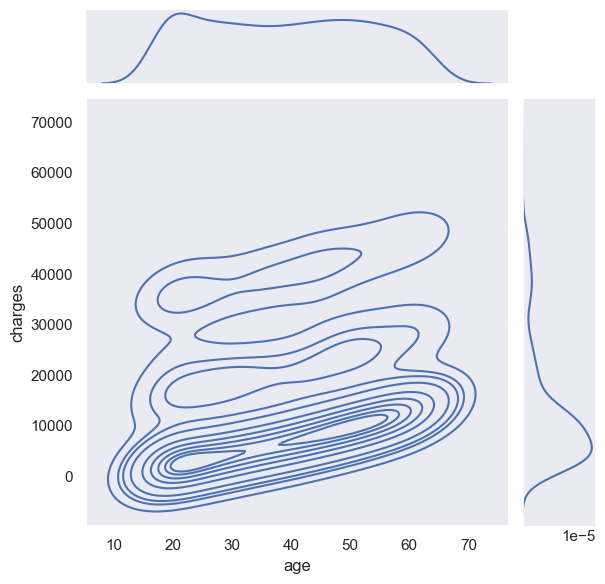

In [149]:
sns.set_style("dark")
sns.jointplot(x='age',y='charges',data=df,kind='kde');

C:\Users\zacha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


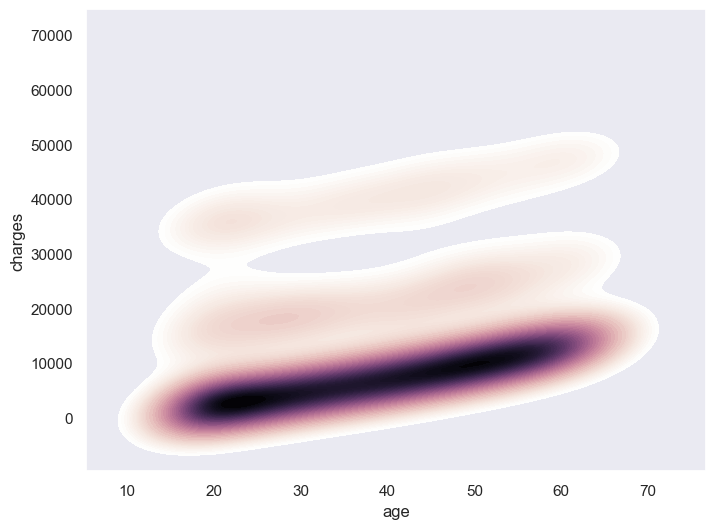

In [153]:
f,ax = plt.subplots(figsize=(8,6))
cmap = sns.cubehelix_palette(as_cmap=True,dark=0,light=1,reverse=False)
sns.kdeplot(df.age,df.charges,cmap=cmap,n_levels=60,shade=True);

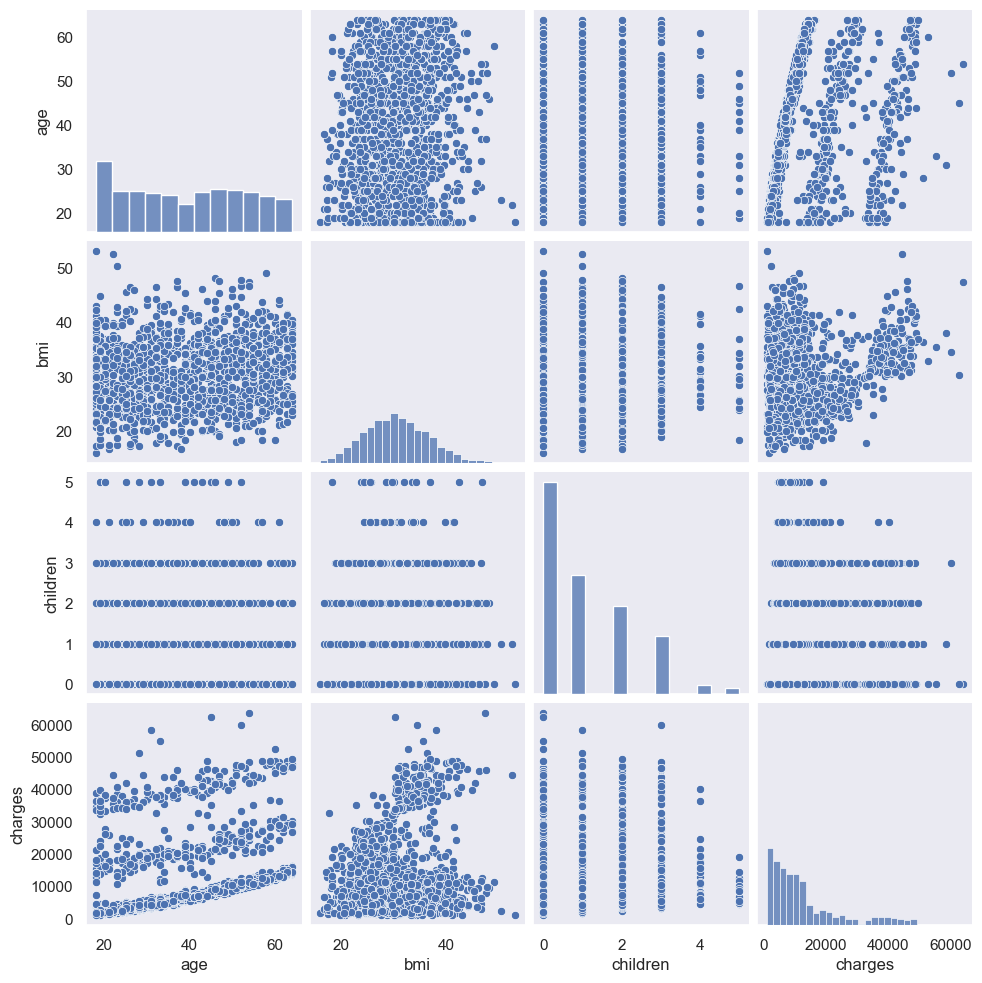

In [155]:
df.dropna(inplace=True)
sns.pairplot(df)
plt.show()

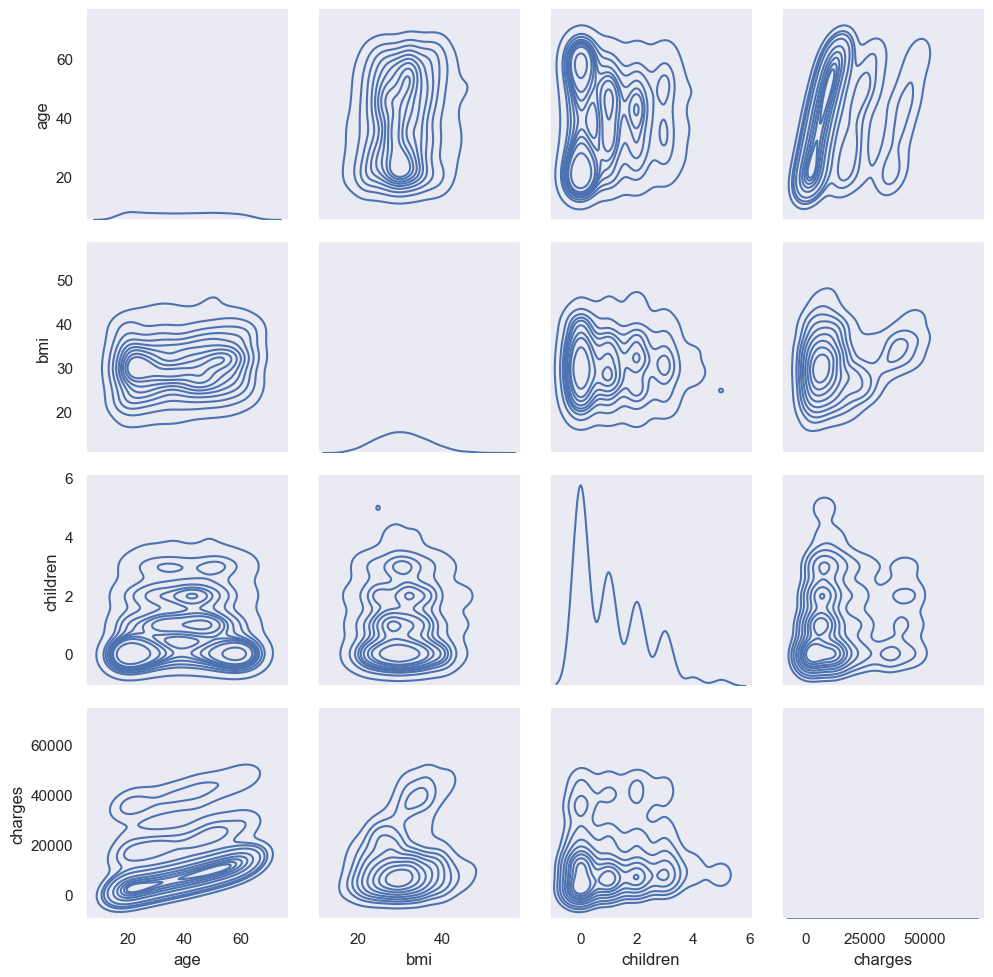

In [158]:
g = sns.PairGrid(df)
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot,n_levels=10);

C:\Users\zacha\AppData\Local\Temp\ipykernel_3016\3370167984.py:8: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  three_d_plot = Axes3D(fig)


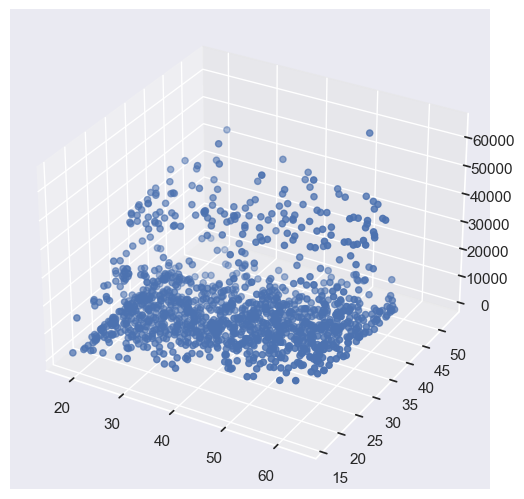

In [161]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

font = {'size':8}
plt.rc('font',**font)

fig = plt.figure()
three_d_plot = Axes3D(fig)
three_d_plot.scatter(df.age,df.bmi,df.charges)

plt.show()

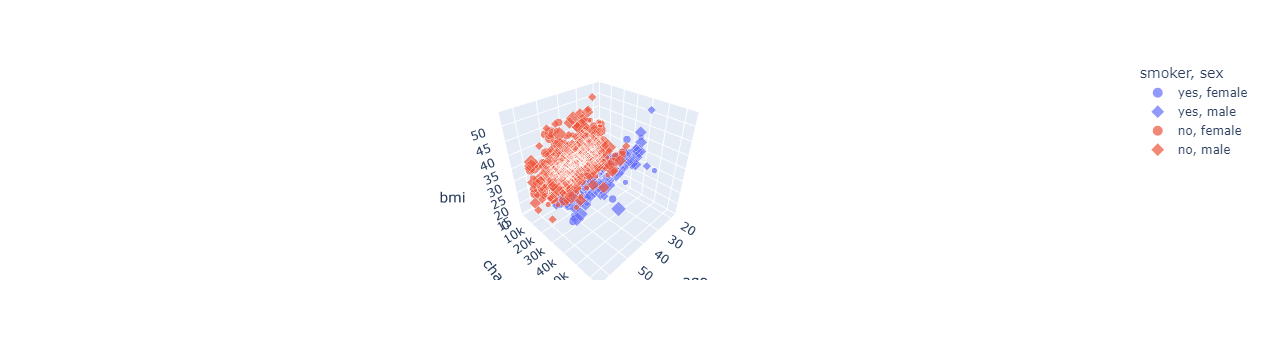

In [167]:
import pandas as pd
import plotly.express as px

fig = px.scatter_3d(df,x='age',y='charges',z='bmi',color='smoker',symbol='sex',size='children')
fig.show()